In [1]:
import pandas as pd
import json
from functools import partial

import geopandas as gpd
from shapely.geometry import box, mapping
%matplotlib inline
from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_points_griddata, rasterize_points_radial
from rasterio.enums import MergeAlg
import matplotlib.pyplot as plt
from osgeo import gdal

C:\Users\user\.conda\envs\geospatial\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Provide the file path of the Excel file
file_path = "P:\\OneDrive - Indian Institute of Science\\Colab_SreeDevi_Poornima\\work\\rainfall_GLEAM_data\\rf_var_n.xlsx"

# Provide the name or index of the sheet you want to read
my_list = ["rf", "E", "SMroot", "SMsurf"]
gdf = {}
geo_grid = {}
df = {}
# Read the Excel file
for i in range(4):
    df[i] = pd.read_excel(file_path, sheet_name=my_list[i])
    gdf[i] = gpd.GeoDataFrame(df[i], geometry=gpd.points_from_xy(df[i].lon, df[i].lat), crs="epsg:4326")
  

In [3]:
gdf[0]

,grid,lon,lat,AMR1,AMR2,DR3,geometry
0,G1,74.75,12.25,NaN,NaN,NaN,POINT (74.75000 12.25000)
1,G2,75.00,12.25,97.359833,96.547095,96.547095,POINT (75.00000 12.25000)
2,G3,75.25,12.25,146.281690,156.407361,156.407361,POINT (75.25000 12.25000)
3,G4,75.50,12.25,138.476175,163.379550,163.379550,POINT (75.50000 12.25000)
4,G5,75.75,12.25,88.292656,74.967838,74.967838,POINT (75.75000 12.25000)
5,G6,76.00,12.25,31.692399,26.581071,26.581071,POINT (76.00000 12.25000)
6,G7,74.75,12.50,NaN,NaN,NaN,POINT (74.75000 12.50000)
7,G8,75.00,12.50,108.875634,102.295378,102.295378,POINT (75.00000 12.50000)
8,G9,75.25,12.50,121.060292,112.562316,112.562316,POINT (75.25000 12.50000)
9,G10,75.50,12.50,111.645564,118.341515,118.341515,POINT (75.50000 12.50000)


In [4]:
geo_grid[0] = make_geocube(vector_data=gdf[0],measurements=["AMR1"],resolution=(0.25, 0.25),
                        rasterize_function=rasterize_points_griddata,)
geo_grid[1] = make_geocube(vector_data=gdf[1],measurements=["E1"],resolution=(0.25, 0.25),
                        rasterize_function=rasterize_points_griddata,)
geo_grid[2] = make_geocube(vector_data=gdf[2],measurements=["SMroot1"],resolution=(0.25, 0.25),
                        rasterize_function=rasterize_points_griddata,)
geo_grid[3] = make_geocube(vector_data=gdf[3],measurements=["SMsurf1"],resolution=(0.25, 0.25),
                        rasterize_function=rasterize_points_griddata,)


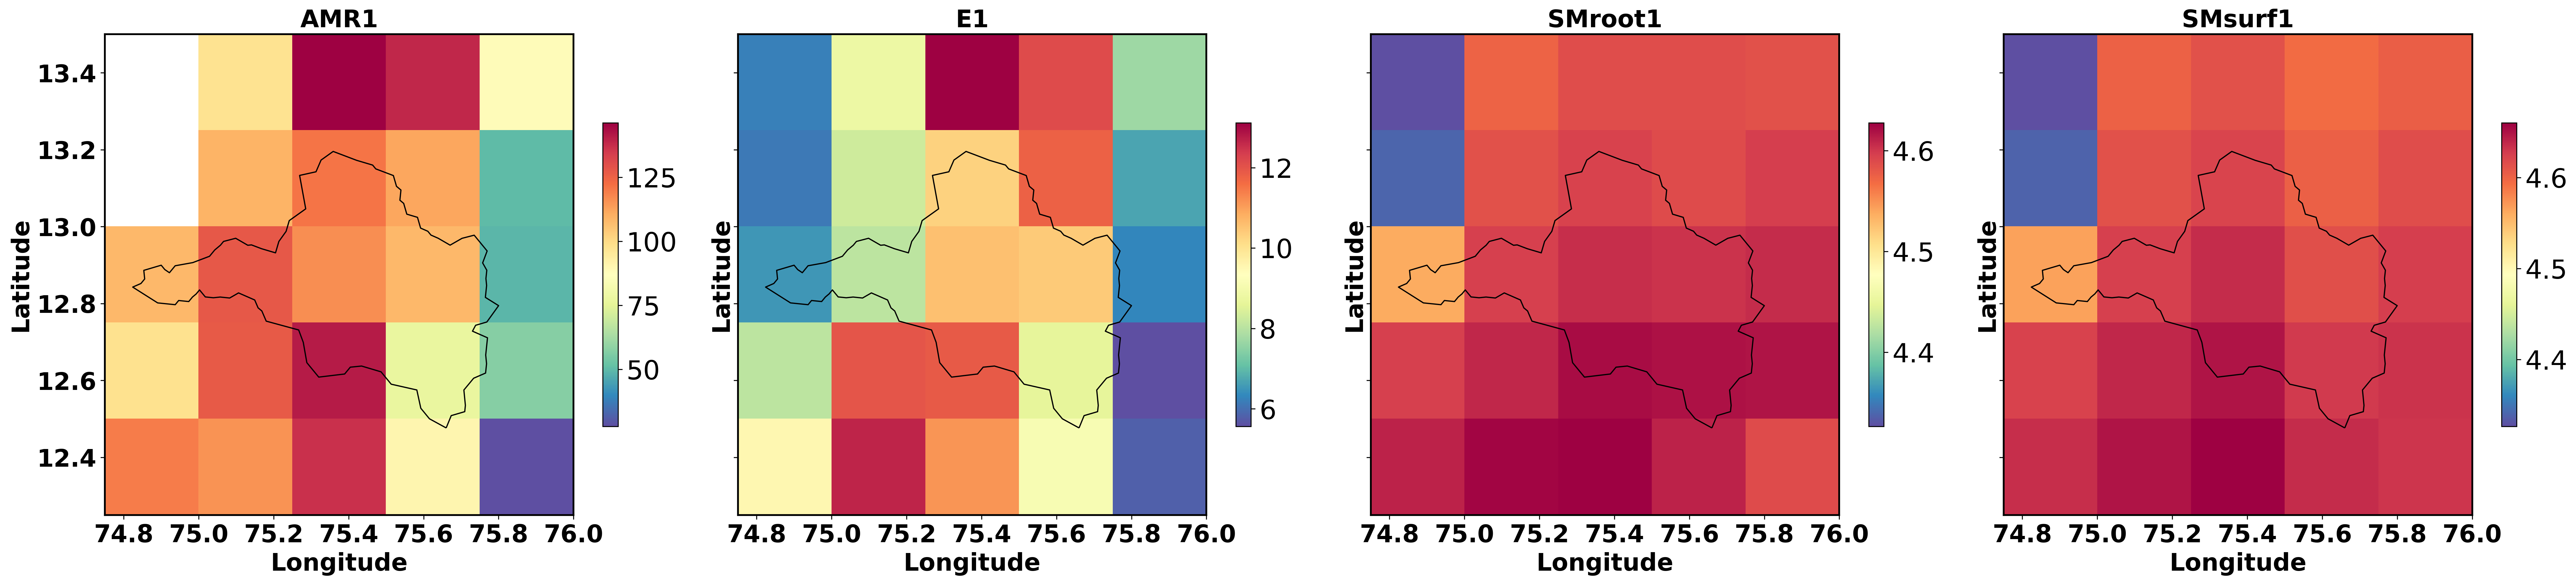

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30, 6.8), dpi=300, sharex = True,sharey=True)
shp1 = gpd.read_file("P:\\OneDrive - Indian Institute of Science\\Colab_SreeDevi_Poornima\\work\\spatialmaps\\netravathiriverbasin_proj.shp")

xmin, ymin, xmax, ymax = [gdf[0].lon.min(), gdf[0].lat.min(), gdf[0].lon.max(), gdf[0].lat.max()]
xres, yres = [0.25, 0.25]
x = np.arange(xmin, xmax, xres)
y = np.arange(ymax, ymin, -yres)
xx, yy = np.meshgrid(x, y)
im = {}
my_list = ["AMR1", "E1", "SMroot1", "SMsurf1"]
cmaps = "Spectral_r"
im[0]=ax[0].imshow(geo_grid[0].AMR1, extent=[xmin, xmax, ymin, ymax], cmap=cmaps)
im[1]=ax[1].imshow(geo_grid[1].E1, extent=[xmin, xmax, ymin, ymax], cmap=cmaps)
im[2]=ax[2].imshow(geo_grid[2].SMroot1, extent=[xmin, xmax, ymin, ymax], cmap=cmaps)
im[3]=ax[3].imshow(geo_grid[3].SMsurf1, extent=[xmin, xmax, ymin, ymax], cmap=cmaps)
for a in range(4):
    shp1.plot(ax=ax[a], facecolor="none", edgecolor="black")
    ax[a].set_title(my_list[a], fontdict={'fontsize': '20', 'fontweight': 'bold'}, x=0.5, y=1.0)
    ax[a].set_xlabel('Longitude', fontsize = 20, fontweight = 'bold')
    ax[a].set_ylabel('Latitude', fontsize = 20, fontweight = 'bold')
    cbar=plt.colorbar(im[a], ax=ax[a], shrink=0.55)
    cbar.ax.tick_params(labelsize=22)
    for label in (ax[a].get_xticklabels() + ax[a].get_yticklabels()):
        label.set_fontsize(20)
        label.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax[a].spines[axis].set_linewidth(1.5)
        ax[a].spines[axis].set_edgecolor("black")

# Adjust the spacing between subplots
fig.tight_layout()        
plt.show()

fig.savefig('P:\\OneDrive - Indian Institute of Science\\Colab_SreeDevi_Poornima\\work\\results\\pics\\1 case_n.tif', dpi=300)


In [6]:
geo_grid[0] = make_geocube(vector_data=gdf[0],measurements=["AMR2"],resolution=(0.25, 0.25),
                        rasterize_function=rasterize_points_griddata,)
geo_grid[1] = make_geocube(vector_data=gdf[1],measurements=["E2"],resolution=(0.25, 0.25),
                        rasterize_function=rasterize_points_griddata,)
geo_grid[2] = make_geocube(vector_data=gdf[2],measurements=["SMroot2"],resolution=(0.25, 0.25),
                        rasterize_function=rasterize_points_griddata,)
geo_grid[3] = make_geocube(vector_data=gdf[3],measurements=["SMsurf2"],resolution=(0.25, 0.25),
                        rasterize_function=rasterize_points_griddata,)

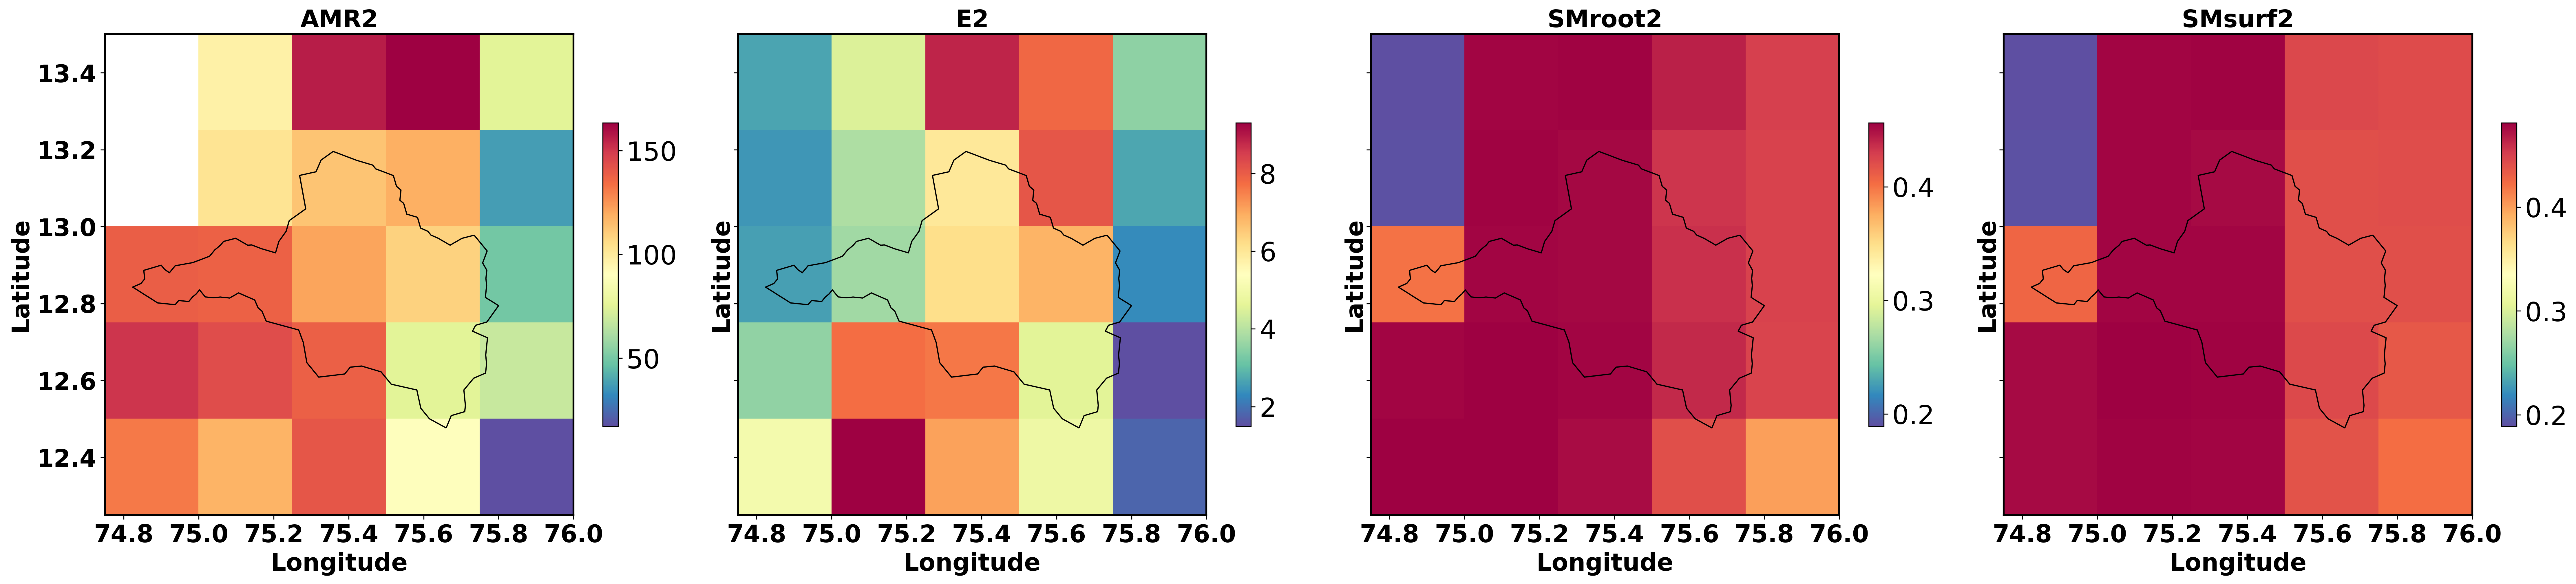

In [7]:

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30, 6.8), dpi=300, sharex = True,sharey=True)
shp1 = gpd.read_file("P:\\OneDrive - Indian Institute of Science\\Colab_SreeDevi_Poornima\\work\\spatialmaps\\netravathiriverbasin_proj.shp")

xmin, ymin, xmax, ymax = [gdf[0].lon.min(), gdf[0].lat.min(), gdf[0].lon.max(), gdf[0].lat.max()]
xres, yres = [0.25, 0.25]
x = np.arange(xmin, xmax, xres)
y = np.arange(ymax, ymin, -yres)
xx, yy = np.meshgrid(x, y)
im = {}
my_list = ["AMR2", "E2", "SMroot2", "SMsurf2"]

im[0]=ax[0].imshow(geo_grid[0].AMR2, extent=[xmin, xmax, ymin, ymax], cmap=cmaps)
im[1]=ax[1].imshow(geo_grid[1].E2, extent=[xmin, xmax, ymin, ymax], cmap=cmaps)
im[2]=ax[2].imshow(geo_grid[2].SMroot2, extent=[xmin, xmax, ymin, ymax], cmap=cmaps)
im[3]=ax[3].imshow(geo_grid[3].SMsurf2, extent=[xmin, xmax, ymin, ymax], cmap=cmaps)
for a in range(4):
    shp1.plot(ax=ax[a], facecolor="none", edgecolor="black")
    ax[a].set_title(my_list[a], fontdict={'fontsize': '20', 'fontweight': 'bold'}, x=0.5, y=1.0)
    ax[a].set_xlabel('Longitude', fontsize = 20, fontweight = 'bold')
    ax[a].set_ylabel('Latitude', fontsize = 20, fontweight = 'bold')
    cbar=plt.colorbar(im[a], ax=ax[a], shrink=0.55)
    cbar.ax.tick_params(labelsize=22)
    for label in (ax[a].get_xticklabels() + ax[a].get_yticklabels()):
        label.set_fontsize(20)
        label.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax[a].spines[axis].set_linewidth(1.5)
        ax[a].spines[axis].set_edgecolor("black")

# Adjust the spacing between subplots
fig.tight_layout()        
plt.show()

fig.savefig('P:\\OneDrive - Indian Institute of Science\\Colab_SreeDevi_Poornima\\work\\results\\pics\\2 case_n.tif', dpi=300)


In [8]:
geo_grid[0] = make_geocube(vector_data=gdf[0],measurements=["DR3"],resolution=(0.25, 0.25),
                        rasterize_function=rasterize_points_griddata,)
geo_grid[1] = make_geocube(vector_data=gdf[1],measurements=["E3"],resolution=(0.25, 0.25),
                        rasterize_function=rasterize_points_griddata,)
geo_grid[2] = make_geocube(vector_data=gdf[2],measurements=["SMroot3"],resolution=(0.25, 0.25),
                        rasterize_function=rasterize_points_griddata,)
geo_grid[3] = make_geocube(vector_data=gdf[3],measurements=["SMsurf3"],resolution=(0.25, 0.25),
                        rasterize_function=rasterize_points_griddata,)

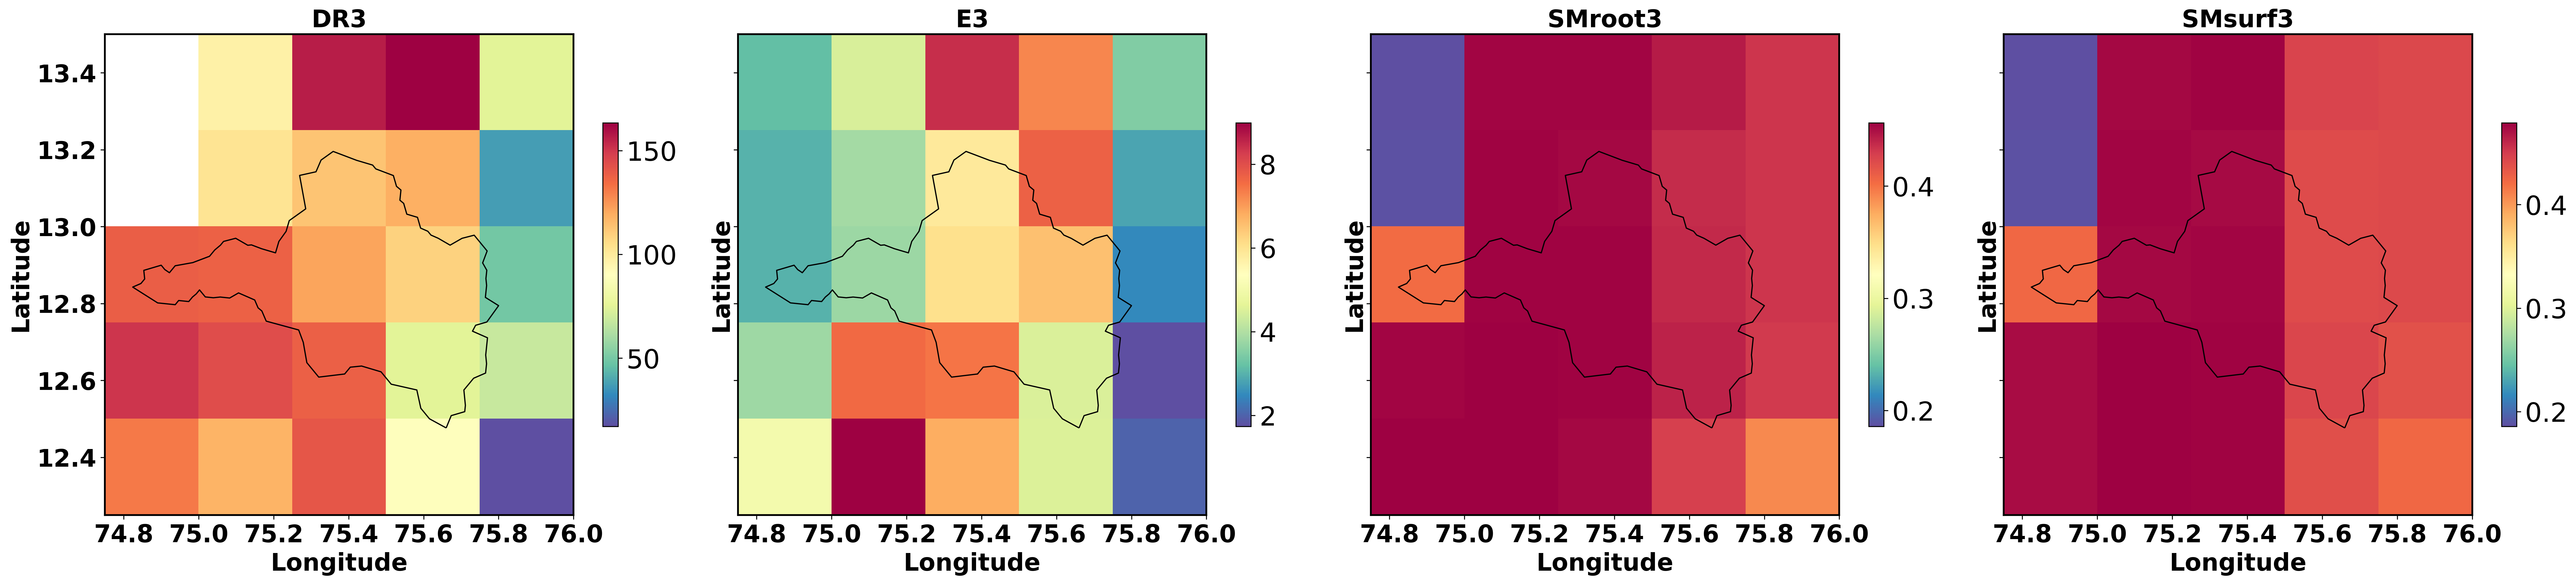

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30, 6.8), dpi=300, sharex = True,sharey=True)
shp1 = gpd.read_file("P:\\OneDrive - Indian Institute of Science\\Colab_SreeDevi_Poornima\\work\\spatialmaps\\netravathiriverbasin_proj.shp")


xmin, ymin, xmax, ymax = [gdf[0].lon.min(), gdf[0].lat.min(), gdf[0].lon.max(), gdf[0].lat.max()]
xres, yres = [0.25, 0.25]
x = np.arange(xmin, xmax, xres)
y = np.arange(ymax, ymin, -yres)
xx, yy = np.meshgrid(x, y)
im = {}
my_list = ["DR3", "E3", "SMroot3", "SMsurf3"]

im[0]=ax[0].imshow(geo_grid[0].DR3, extent=[xmin, xmax, ymin, ymax], cmap=cmaps)
im[1]=ax[1].imshow(geo_grid[1].E3, extent=[xmin, xmax, ymin, ymax], cmap=cmaps)
im[2]=ax[2].imshow(geo_grid[2].SMroot3, extent=[xmin, xmax, ymin, ymax], cmap=cmaps)
im[3]=ax[3].imshow(geo_grid[3].SMsurf3, extent=[xmin, xmax, ymin, ymax], cmap=cmaps)
for a in range(4):
    shp1.plot(ax=ax[a], facecolor="none", edgecolor="black")
    ax[a].set_title(my_list[a], fontdict={'fontsize': '20', 'fontweight': 'bold'}, x=0.5, y=1.0)
    ax[a].set_xlabel('Longitude', fontsize = 20, fontweight = 'bold')
    ax[a].set_ylabel('Latitude', fontsize = 20, fontweight = 'bold')
    cbar=plt.colorbar(im[a], ax=ax[a], shrink=0.55)
    cbar.ax.tick_params(labelsize=22)
    for label in (ax[a].get_xticklabels() + ax[a].get_yticklabels()):
        label.set_fontsize(20)
        label.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax[a].spines[axis].set_linewidth(1.5)
        ax[a].spines[axis].set_edgecolor("black")

# Adjust the spacing between subplots
fig.tight_layout()        
plt.show()

fig.savefig('P:\\OneDrive - Indian Institute of Science\\Colab_SreeDevi_Poornima\\work\\results\\pics\\3 case_n.tif', dpi=300)
